# Mini Project: Dermatologist AI

## Import data

In [2]:
import os
import numpy as np
import tensorflow as tf
import glob

from tensorflow_vgg import vgg16
from tensorflow_vgg import utils

def listdir_nohidden(path):
    return glob.glob(os.path.join(path, '*'))

In [2]:
data_dir_train = 'data/train/'
contents_train = os.listdir(data_dir_train)
classes_train = [each for each in contents_train if os.path.isdir(data_dir_train + each)]
print(classes_train)

data_dir_test = 'data/test/'
contents_test = os.listdir(data_dir_test)
classes_test = [each for each in contents_test if os.path.isdir(data_dir_test + each)]
print(classes_test)

data_dir_valid = 'data/valid/'
contents_valid = os.listdir(data_dir_valid)
classes_valid = [each for each in contents_valid if os.path.isdir(data_dir_valid + each)]
print(classes_test)

['melanoma', 'nevus', 'seborrheic_keratosis']
['melanoma', 'nevus', 'seborrheic_keratosis']
['melanoma', 'nevus', 'seborrheic_keratosis']


In [3]:
batch_size = 10
codes_list = []
labels_train = []
batch_train = []
codes_train = None

with tf.Session() as sess:
    # TODO: Build the vgg network here
    sess.run(tf.global_variables_initializer())
    vgg = vgg16.Vgg16()
    input_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
    with tf.name_scope("content_vgg"):
        vgg.build(input_)

/Users/takumkawahara/Document/Data_Analytics/Udacity/Deep_Learning_Nanodegree_Foundation/3.Convolutional_Networks/Lesson8.Deep_Learning_for_Cancer_Detection/tensorflow_vgg/vgg16.npy
npy file loaded
build model started
build model finished: 0s


## Run the Training images through the VGGNet convolutional layers and record the values of the first fully connected layer.

In [3]:
# Set the batch size higher if you can fit in in your GPU memory
batch_size = 10
codes_list = []
labels_train = []
batch_train = []
codes_train = None

with tf.Session() as sess:
    # TODO: Build the vgg network here
    sess.run(tf.global_variables_initializer())
    vgg = vgg16.Vgg16()
    input_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
    with tf.name_scope("content_vgg"):
        vgg.build(input_)
        
    for each in classes_train:
        print("Starting {} images".format(each))
        class_path_train = data_dir_train + each
        files_train = [f for f in os.listdir(class_path_train) if not f.startswith('.')]
        for ii, file in enumerate(files_train, 1):
            # Add images to the current batch
            # utils.load_image crops the input images for us, from the center
            img_train = utils.load_image(os.path.join(class_path_train, file))
            batch_train.append(img_train.reshape((1, 224, 224, 3)))
            labels_train.append(each)
            
            # Running the batch through the network to get the codes
            if ii % batch_size == 0 or ii == len(files_train):
                
                # Image batch to pass to VGG network
                images_train = np.concatenate(batch_train)
                
                # TODO: Get the values from the relu6 layer of the VGG network
                feed_dict = {input_: images_train}
                codes_batch_train = sess.run(vgg.relu6, feed_dict=feed_dict)
                
                # Here I'm building an array of the codes
                if codes_train is None:
                    codes_train = codes_batch_train
                else:
                    codes_train = np.concatenate((codes_train, codes_batch_train))
                
                # Reset to start building the next batch
                batch_train = []
                print('{} images processed'.format(ii))

/Users/takumkawahara/Document/Data_Analytics/Udacity/Deep_Learning_Nanodegree_Foundation/3.Convolutional_Networks/Lesson8.DeepLearning_for_Cancer_Detection/tensorflow_vgg/vgg16.npy
npy file loaded
build model started
build model finished: 0s
Starting melanoma images
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
60 images processed
70 images processed
80 images processed
90 images processed
100 images processed
Starting nevus images
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
60 images processed
70 images processed
80 images processed
90 images processed
100 images processed
Starting seborrheic_keratosis images
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
60 images processed
70 images processed
80 images processed
90 images processed
100 images processed


## Run the Testing images through the VGGNet convolutional layers and record the values of the first fully connected layer.

In [4]:
# Set the batch size higher if you can fit in in your GPU memory
batch_size = 10
codes_list = []
labels_test = []
labels_detail_test = []
batch_test = []
codes_test = None

with tf.Session() as sess:
    # TODO: Build the vgg network here
    sess.run(tf.global_variables_initializer())
    vgg = vgg16.Vgg16()
    input_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
    with tf.name_scope("content_vgg"):
        vgg.build(input_)
        
    for each in classes_test:
        print("Starting {} images".format(each))
        class_path_test = data_dir_test + each
        files_test = [f for f in os.listdir(class_path_test) if not f.startswith('.')]
        for ii, file in enumerate(files_test, 1):
            # Add images to the current batch
            # utils.load_image crops the input images for us, from the center
            img_test = utils.load_image(os.path.join(class_path_test, file))
            batch_test.append(img_test.reshape((1, 224, 224, 3)))
            labels_test.append(each)
            labels_detail_test.append(class_path_test+'/'+file)
            
            # Running the batch through the network to get the codes
            if ii % batch_size == 0 or ii == len(files_test):
                
                # Image batch to pass to VGG network
                images_test = np.concatenate(batch_test)
                
                # TODO: Get the values from the relu6 layer of the VGG network
                feed_dict = {input_: images_test}
                codes_batch_test = sess.run(vgg.relu6, feed_dict=feed_dict)
                
                # Here I'm building an array of the codes
                if codes_test is None:
                    codes_test = codes_batch_test
                else:
                    codes_test = np.concatenate((codes_test, codes_batch_test))
                
                # Reset to start building the next batch
                batch_test = []
                print('{} images processed'.format(ii))

/home/ubuntu/New/tensorflow_vgg/vgg16.npy
npy file loaded
build model started
build model finished: 0s
Starting seborrheic_keratosis images
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
60 images processed
70 images processed
80 images processed
90 images processed
Starting melanoma images
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
60 images processed
70 images processed
80 images processed
90 images processed
100 images processed
110 images processed
117 images processed
Starting nevus images
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
60 images processed
70 images processed
80 images processed
90 images processed
100 images processed
110 images processed
120 images processed
130 images processed
140 images processed
150 images processed
160 images processed
170 images processed
180 images processed
190 images processed


## Run the Validation images through the VGGNet convolutional layers and record the values of the first fully connected layer.

In [5]:
# Set the batch size higher if you can fit in in your GPU memory
batch_size = 10
codes_list = []
labels_valid = []
batch_valid = []
codes_valid = None

with tf.Session() as sess:
    # TODO: Build the vgg network here
    sess.run(tf.global_variables_initializer())
    vgg = vgg16.Vgg16()
    input_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
    with tf.name_scope("content_vgg"):
        vgg.build(input_)
        
    for each in classes_valid:
        print("Starting {} images".format(each))
        class_path_valid = data_dir_valid + each
        files_valid = [f for f in os.listdir(class_path_valid) if not f.startswith('.')]
        for ii, file in enumerate(files_valid, 1):
            # Add images to the current batch
            # utils.load_image crops the input images for us, from the center
            img_valid = utils.load_image(os.path.join(class_path_valid, file))
            batch_valid.append(img_valid.reshape((1, 224, 224, 3)))
            labels_valid.append(each)
            
            # Running the batch through the network to get the codes
            if ii % batch_size == 0 or ii == len(files_valid):
                
                # Image batch to pass to VGG network
                images_valid = np.concatenate(batch_valid)
                
                # TODO: Get the values from the relu6 layer of the VGG network
                feed_dict = {input_: images_valid}
                codes_batch_valid = sess.run(vgg.relu6, feed_dict=feed_dict)
                
                # Here I'm building an array of the codes
                if codes_valid is None:
                    codes_valid = codes_batch_valid
                else:
                    codes_valid = np.concatenate((codes_valid, codes_batch_valid))
                
                # Reset to start building the next batch
                batch_valid = []
                print('{} images processed'.format(ii))

/Users/takumkawahara/Document/Data_Analytics/Udacity/Deep_Learning_Nanodegree_Foundation/3.Convolutional_Networks/Lesson8.DeepLearning_for_Cancer_Detection/tensorflow_vgg/vgg16.npy
npy file loaded
build model started
build model finished: 0s
Starting melanoma images
10 images processed
20 images processed
30 images processed
Starting nevus images
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
60 images processed
70 images processed
78 images processed
Starting seborrheic_keratosis images
10 images processed
20 images processed
30 images processed
40 images processed
42 images processed


## Write codes and labels to file.

## Read codes and labels from file.

In [4]:
import csv

## Traininig data
with open('codes_train', 'w') as f:
    codes_train.tofile(f)
with open('labels_train', 'w') as f:
    writer_train = csv.writer(f, delimiter='\n')
    writer_train.writerow(labels_train)
    
## Test data
with open('codes_test', 'w') as f:
    codes_test.tofile(f)
with open('labels_test', 'w') as f:
    writer_test = csv.writer(f, delimiter='\n')
    writer_test.writerow(labels_test)     
with open('labels_detail_test', 'w') as f:
    writer_test_detail = csv.writer(f, delimiter='\n')
    writer_test_detail.writerow(labels_detail_test) 

## Validation data
with open('codes_valid', 'w') as f:
    codes_valid.tofile(f)
with open('labels_valid', 'w') as f:
    writer_valid = csv.writer(f, delimiter='\n')
    writer_valid.writerow(labels_valid) 


AttributeError: 'str' object has no attribute 'tofile'

In [4]:
# without these codes, we get error "GraphDef cannot be larger than 2GB."
import csv

# Training data
with open('labels_train') as f:
    reader_train = csv.reader(f, delimiter='\n')
    labels_train = np.array([each for each in reader_train if len(each) > 0]).squeeze()
with open('codes_train') as f:
    codes_train = np.fromfile(f, dtype=np.float32)
    codes_train = codes_train.reshape((len(labels_train), -1))
    
# Test data
with open('labels_test') as f:
    reader_test = csv.reader(f, delimiter='\n')
    labels_test = np.array([each for each in reader_test if len(each) > 0]).squeeze()
with open('labels_detail_test') as f:
    reader_test_detail = csv.reader(f, delimiter='\n')
    labels_test_detail = np.array([each for each in reader_test_detail if len(each) > 0]).squeeze()
with open('codes_test') as f:
    codes_test = np.fromfile(f, dtype=np.float32)
    codes_test = codes_test.reshape((len(labels_test), -1))
    
# Validation data
with open('labels_valid') as f:
    reader_valid = csv.reader(f, delimiter='\n')
    labels_valid = np.array([each for each in reader_valid if len(each) > 0]).squeeze()
with open('codes_valid') as f:
    codes_valid = np.fromfile(f, dtype=np.float32)
    codes_valid = codes_valid.reshape((len(labels_valid), -1))
    

## Use all training data

In [5]:
print(labels_train.shape)
print(codes_train.shape)

(2000,)
(2000, 4096)


## Use same number of training data

In [6]:
import numpy as np
labels_train = np.hstack((labels_train[0:254], labels_train[254:254+254], labels_train[254+374:254+374+254]))
codes_train = np.vstack((codes_train[0:254], codes_train[254:254+254], codes_train[254+374:254+374+254]))
print(labels_train.shape)
print(codes_train.shape)

(762,)
(762, 4096)


## Prepare One-hot encoded labels array

In [7]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

labels_train_vecs = lb.fit(labels_train).transform(labels_train)
labels_test_vecs = lb.fit(labels_test).transform(labels_test)
labels_valid_vecs = lb.fit(labels_valid).transform(labels_valid)

In [8]:
print("Train shapes (x, y):", codes_train.shape, labels_train_vecs.shape)
print("Validation shapes (x, y):", codes_test.shape, labels_test_vecs.shape)
print("Test shapes (x, y):", codes_valid.shape, labels_valid_vecs.shape)

Train shapes (x, y): (762, 4096) (762, 3)
Validation shapes (x, y): (600, 4096) (600, 3)
Test shapes (x, y): (150, 4096) (150, 3)


## Shuffle training data set to avoid Overfitting

In [9]:
import sklearn
codes_train_sf, labels_train_vecs_sf = sklearn.utils.shuffle(codes_train, labels_train_vecs)

## Building Classifier

In [10]:
inputs_ = tf.placeholder(tf.float32, shape=[None, codes_train.shape[1]])
labels_ = tf.placeholder(tf.int64, shape=[None, labels_train_vecs.shape[1]])
keep_prob = tf.placeholder(tf.float32)
learning_rate = 0.005
dropout = 0.75
ini_weight = 0.015

nd1 = 1024
nd2 = 512
nd3 = 128

# weights, biases
weights = {
    'wd1': tf.Variable(tf.truncated_normal([codes_train.shape[1],nd1], stddev = ini_weight)),
    'wd2': tf.Variable(tf.truncated_normal([nd1,nd2], stddev = ini_weight)),
 #   'wd3': tf.Variable(tf.truncated_normal([nd2, nd3], stddev = ini_weight)),
    'w_out': tf.Variable(tf.truncated_normal([nd2, 3], stddev = ini_weight))
}

biases = {
    'bd1': tf.Variable(tf.truncated_normal([nd1], stddev = ini_weight)),
    'bd2': tf.Variable(tf.truncated_normal([nd2], stddev = ini_weight)),
  #  'bd3': tf.Variable(tf.truncated_normal([nd3], stddev = ini_weight)),
    'b_out': tf.Variable(tf.truncated_normal([3], stddev = ini_weight))
}

def FC_net (x, weights, biases, dropout):
    # Hidden layer
    fc1 = tf.add(tf.matmul(x, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)
    #fc3 = tf.add(tf.matmul(fc2, weights['wd3']), biases['bd3'])
    #fc3 = tf.nn.relu(fc3)
    #fc3 = tf.nn.dropout(fc3, dropout)
    
    # Output layer
    out = tf.add(tf.matmul(fc2, weights['w_out']), biases['b_out'])
    
    return out

# output layer logits
logits = FC_net(inputs_, weights, biases, keep_prob)
# cross entropy loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = labels_))

# training optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

# Operations for validation/test accuracy
predicted = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(predicted, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [11]:
def get_batches(x, y, n_batches=10):
    """ Return a generator that yields batches from arrays x and y. """
    batch_size = len(x)//n_batches
    
    for ii in range(0, n_batches*batch_size, batch_size):
        if ii != (n_batches-1)*batch_size:
            X, Y = x[ii: ii+batch_size], y[ii: ii+batch_size] 
        else:
            X, Y = x[ii:], y[ii:]
        yield X, Y

## Training the Classifier

In [14]:
saver = tf.train.Saver()
epochs = 20
iteration = 0
iter_ = []
loss_train = []
loss_valid = []
iter_valid = []
acc_train = []
acc_valid = []

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        for x, y in get_batches(codes_train_sf, labels_train_vecs_sf):
            sess.run(optimizer, feed_dict = {
                inputs_: x,
                labels_: y,
                keep_prob: dropout})
            loss = sess.run(cost, feed_dict = {
                inputs_: x,
                labels_: y,
                keep_prob: dropout
            })
            acc = sess.run(accuracy, feed_dict = {
                inputs_: codes_train_sf,
                labels_: labels_train_vecs_sf,
                keep_prob: dropout
            })            
            val_loss = sess.run(cost, feed_dict = {
                inputs_: codes_valid,
                labels_: labels_valid_vecs,
                keep_prob: dropout
            })
            val_acc = sess.run(accuracy, feed_dict = {
                inputs_: codes_valid,
                labels_: labels_valid_vecs,
                keep_prob: dropout
            })
                        
            print ("Epoch: {}/{}...".format(epoch + 1, epochs),
                   "Iteration: {}".format(iteration),
                  "Training loss: {:.4f}".format(loss))
            
            iter_.append(iteration)
            loss_train.append(loss)
            loss_valid.append(val_loss)
            acc_train.append(acc)
            acc_valid.append(val_acc)
            
            iteration += 1
#            
#            if iteration % 5 ==0:
#                val_acc = sess.run(accuracy, feed_dict = {
#                    inputs_: codes_valid,
#                    labels_: labels_valid_vecs,
#                    keep_prob: dropout
##                })
#                print ("Epoch: {}/{}...".format(epoch + 1, epochs),
#                       "Iteration: {}".format(iteration),
#                       "Validation Acc: {:.4f}".format(val_acc))
#                iter_valid.append(iteration)
#                acc_valid.append(val_acc)

    saver.save(sess, "checkpoints/Dermatologist_Al.ckpt")

Epoch: 1/20... Iteration: 0 Training loss: 1.0822
Epoch: 1/20... Iteration: 1 Training loss: 1.1001
Epoch: 1/20... Iteration: 2 Training loss: 1.1034
Epoch: 1/20... Iteration: 3 Training loss: 1.0698
Epoch: 1/20... Iteration: 4 Training loss: 1.0795
Epoch: 1/20... Iteration: 5 Training loss: 1.0877
Epoch: 1/20... Iteration: 6 Training loss: 1.0680
Epoch: 1/20... Iteration: 7 Training loss: 1.0854
Epoch: 1/20... Iteration: 8 Training loss: 1.0798
Epoch: 1/20... Iteration: 9 Training loss: 1.0774
Epoch: 2/20... Iteration: 10 Training loss: 1.0746
Epoch: 2/20... Iteration: 11 Training loss: 1.0466
Epoch: 2/20... Iteration: 12 Training loss: 1.0502
Epoch: 2/20... Iteration: 13 Training loss: 1.0438
Epoch: 2/20... Iteration: 14 Training loss: 1.0615
Epoch: 2/20... Iteration: 15 Training loss: 1.0629
Epoch: 2/20... Iteration: 16 Training loss: 1.0387
Epoch: 2/20... Iteration: 17 Training loss: 1.0280
Epoch: 2/20... Iteration: 18 Training loss: 1.0553
Epoch: 2/20... Iteration: 19 Training los

Epoch: 16/20... Iteration: 159 Training loss: 0.7552
Epoch: 17/20... Iteration: 160 Training loss: 0.6850
Epoch: 17/20... Iteration: 161 Training loss: 0.6738
Epoch: 17/20... Iteration: 162 Training loss: 0.7149
Epoch: 17/20... Iteration: 163 Training loss: 0.7074
Epoch: 17/20... Iteration: 164 Training loss: 0.6890
Epoch: 17/20... Iteration: 165 Training loss: 0.8047
Epoch: 17/20... Iteration: 166 Training loss: 0.6669
Epoch: 17/20... Iteration: 167 Training loss: 0.7237
Epoch: 17/20... Iteration: 168 Training loss: 0.7280
Epoch: 17/20... Iteration: 169 Training loss: 0.7650
Epoch: 18/20... Iteration: 170 Training loss: 0.6972
Epoch: 18/20... Iteration: 171 Training loss: 0.6740
Epoch: 18/20... Iteration: 172 Training loss: 0.6397
Epoch: 18/20... Iteration: 173 Training loss: 0.6951
Epoch: 18/20... Iteration: 174 Training loss: 0.6507
Epoch: 18/20... Iteration: 175 Training loss: 0.7592
Epoch: 18/20... Iteration: 176 Training loss: 0.6970
Epoch: 18/20... Iteration: 177 Training loss: 

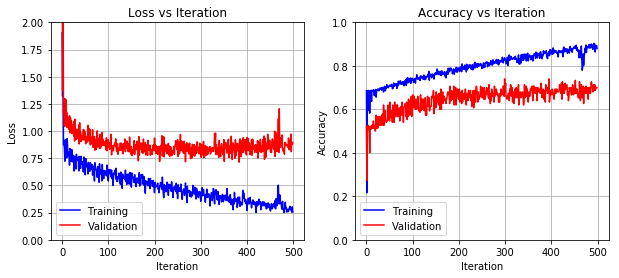

In [12]:
#Reference
# learning rate 0.01
# drop out 0.75
# Initial weight 0.025
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



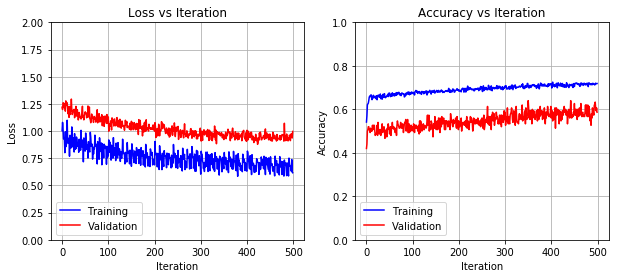

In [16]:
# learning rate 0.001
# drop out 0.75
# Initial weight 0.025
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



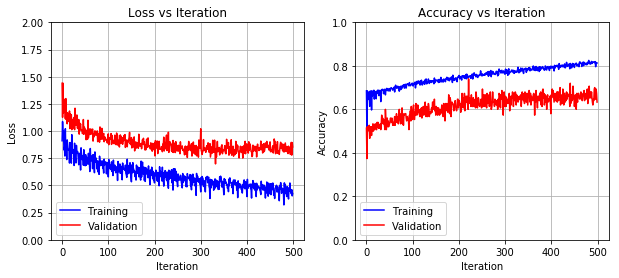

In [20]:
# learning rate 0.005
# drop out 0.75
# Initial weight 0.025
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



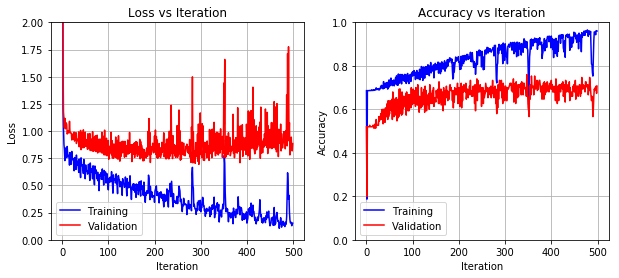

In [32]:
# learning rate 0.02
# drop out 0.75
# Initial weight 0.025
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



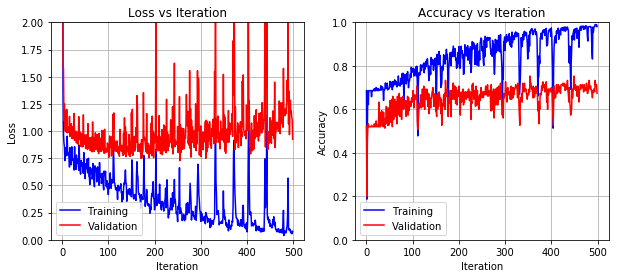

In [24]:
# learning rate 0.05
# drop out 0.75
# Initial weight 0.025
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



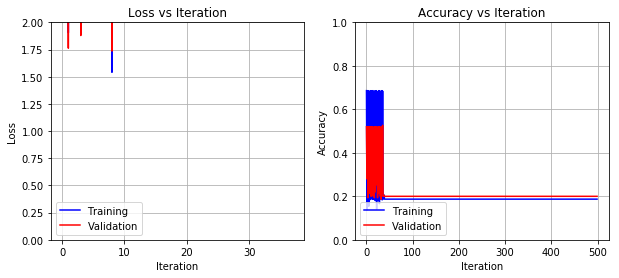

In [28]:
# learning rate 0.1
# drop out 0.75
# Initial weight 0.025
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



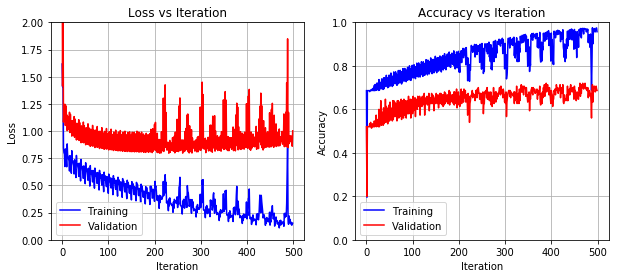

In [36]:
# learning rate 0.01
# drop out 1.00
# Initial weight 0.025
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



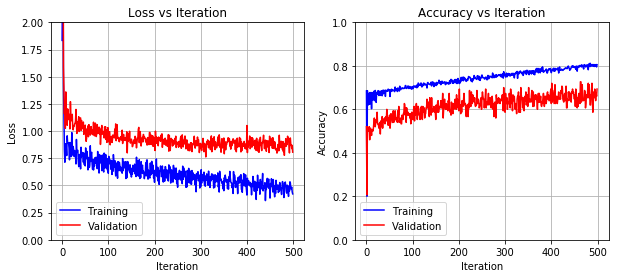

In [40]:
# learning rate 0.01
# drop out 0.50
# Initial weight 0.025
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



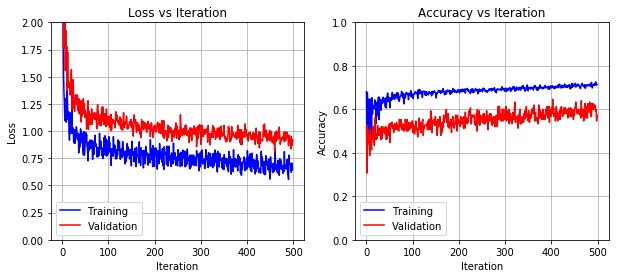

In [44]:
# learning rate 0.01
# drop out 0.25
# Initial weight 0.025
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



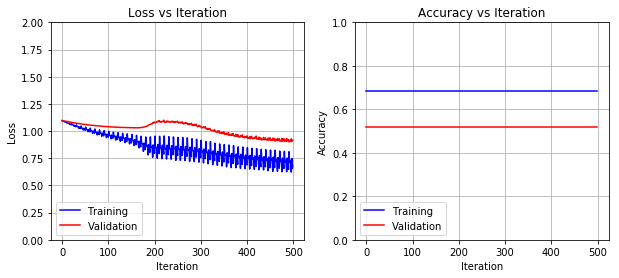

In [48]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.001
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



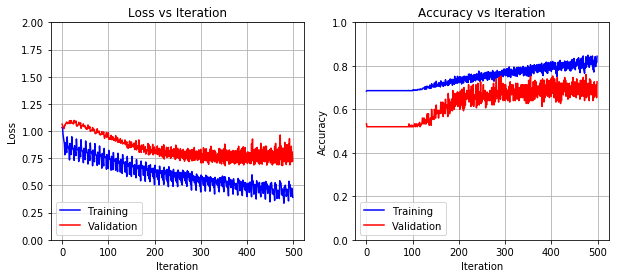

In [52]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.01
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



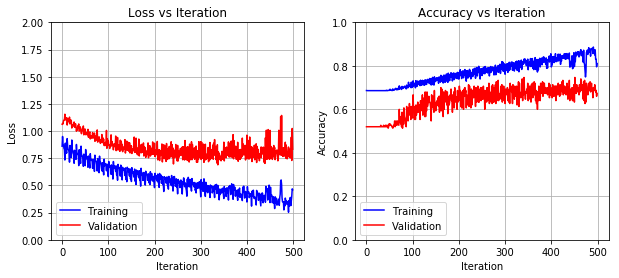

In [68]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.015
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



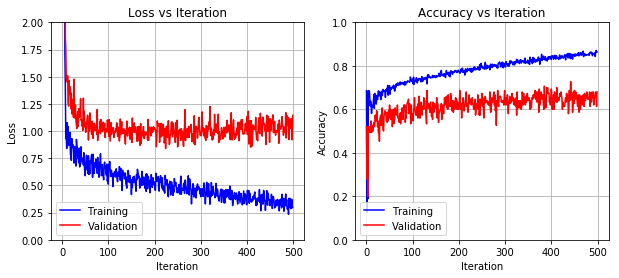

In [56]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.05
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



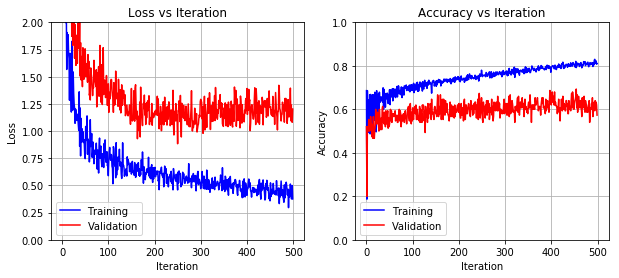

In [60]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.075
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



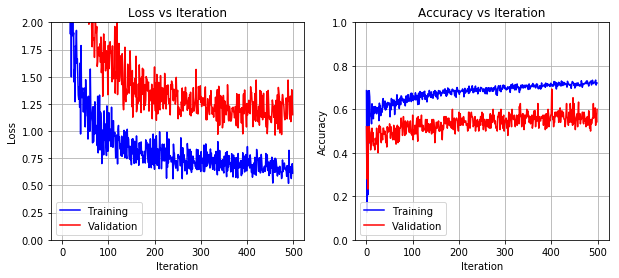

In [64]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.1
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



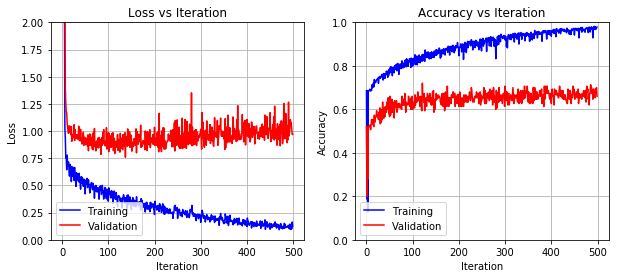

In [73]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.025
# Fully connected layer 2
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



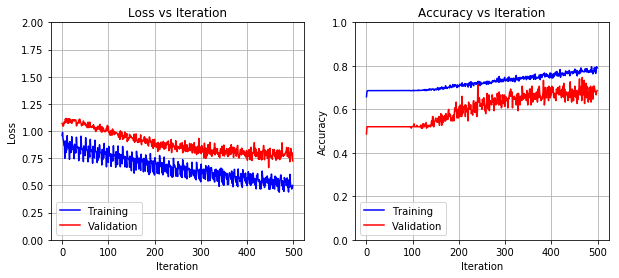

In [78]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.025
# Fully connected layer 4
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



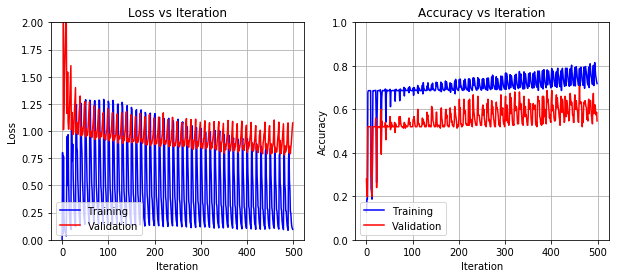

In [82]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.025
# Fully connected layer 3
# NOT shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



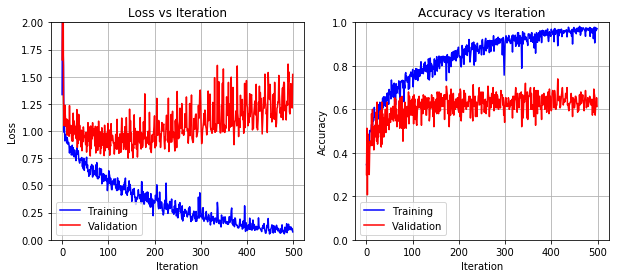

In [92]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.025
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: 254 each
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



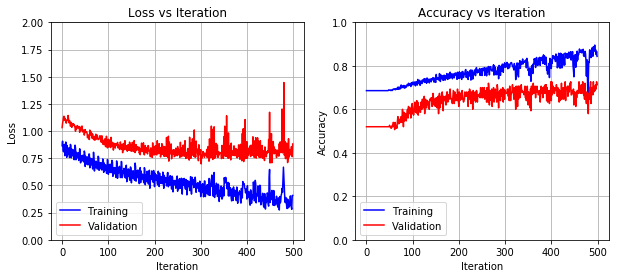

In [101]:
# learning rate 0.01
# drop out 0.75
# Initial weight 0.015
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



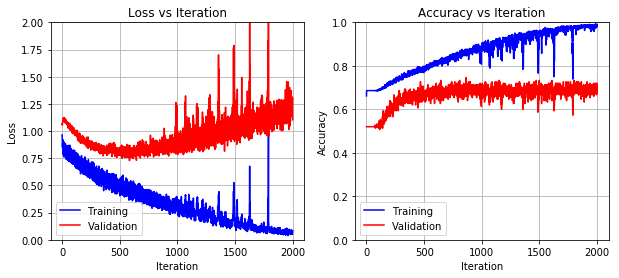

In [107]:
# learning rate 0.005
# drop out 0.75
# Initial weight 0.015
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



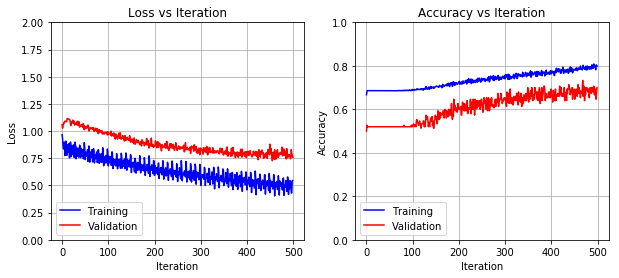

In [109]:
# learning rate 0.005
# drop out 0.75
# Initial weight 0.015
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: Use All data
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



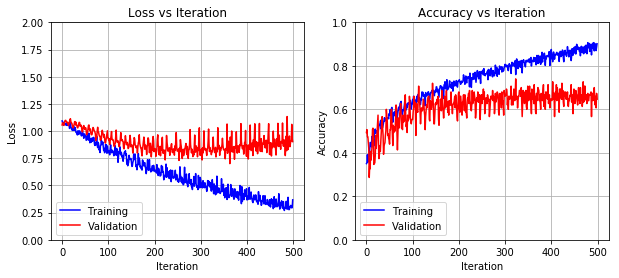

In [13]:
# learning rate 0.005
# drop out 0.75
# Initial weight 0.015
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: 254 each
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



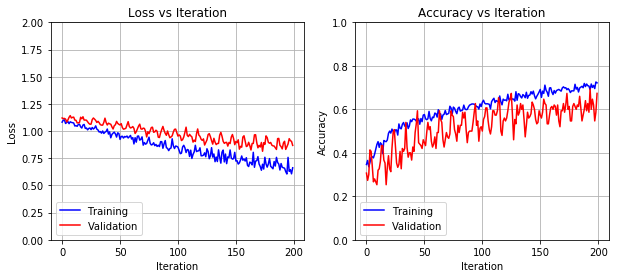

In [15]:
# learning rate 0.005
# drop out 0.75
# Initial weight 0.015
# Fully connected layer 3
# Shuffled training data
# Number of trainng data: 254 each
import matplotlib.pyplot as plt

fig, (fig_loss, fig_acc) = plt.subplots(ncols=2, figsize=(10,4))

fig_loss.plot(iter_, loss_train, color = 'blue', label = "Training")
fig_loss.plot(iter_, loss_valid, color = 'red', label = "Validation")
fig_loss.set_title('Loss vs Iteration')
fig_loss.set_xlabel('Iteration')
fig_loss.set_ylabel('Loss')
fig_loss.set_ylim([0,2.0])
fig_loss.grid()
fig_loss.legend(loc="lower left")

fig_acc.plot(iter_, acc_train, color = 'blue', label = "Training")
fig_acc.plot(iter_, acc_valid, color = 'red', label = "Validation")
fig_acc.set_title('Accuracy vs Iteration')
fig_acc.set_xlabel('Iteration')
fig_acc.set_ylabel('Accuracy')
fig_acc.set_ylim([0,1.0])
fig_acc.grid()
fig_acc.legend(loc="lower left")
plt.show()



In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed = {inputs_: codes_train_sf,
            labels_: labels_train_vecs_sf,
            keep_prob: dropout}
    train_acc = sess.run(accuracy, feed_dict=feed)
    print("Train accuracy: {:.4f}".format(train_acc))
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed = {inputs_: codes_valid,
            labels_: labels_valid_vecs,
            keep_prob: dropout}
    valid_acc = sess.run(accuracy, feed_dict=feed)
    print("Validation accuracy: {:.4f}".format(valid_acc))
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed = {inputs_: codes_test,
            labels_: labels_test_vecs,
            keep_prob: dropout}
    test_acc = sess.run(accuracy, feed_dict=feed)
    print("Test accuracy: {:.4f}".format(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints/Dermatologist_Al.ckpt
Train accuracy: 0.7244
INFO:tensorflow:Restoring parameters from checkpoints/Dermatologist_Al.ckpt
Validation accuracy: 0.6467
INFO:tensorflow:Restoring parameters from checkpoints/Dermatologist_Al.ckpt
Test accuracy: 0.5083


In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed = {inputs_: codes_test,
            labels_: labels_test_vecs,
            keep_prob: dropout}
    prediction = sess.run(predicted, feed_dict=feed)



INFO:tensorflow:Restoring parameters from checkpoints/Dermatologist_Al.ckpt


In [18]:
import csv
ID = labels_test_detail
pred_mela = prediction[:,0]
pred_sebo = prediction[:,2]

final_res = zip(ID,pred_mela,pred_sebo)
head = ['Id', 'task_1', 'task_2']

with open('sample_predictions.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow([h for h in head])
    for row in final_res:
        writer.writerow(row)